# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$\dfrac{dQ}{dw}= \dfrac{1}{l} *2X^T(X*w-y)$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['kilometer', 'autoAgeMonths', 'powerPS']
other = []

# YOUR CODE (EDA):

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


Text(0.5, 1.0, 'Distribution of price')

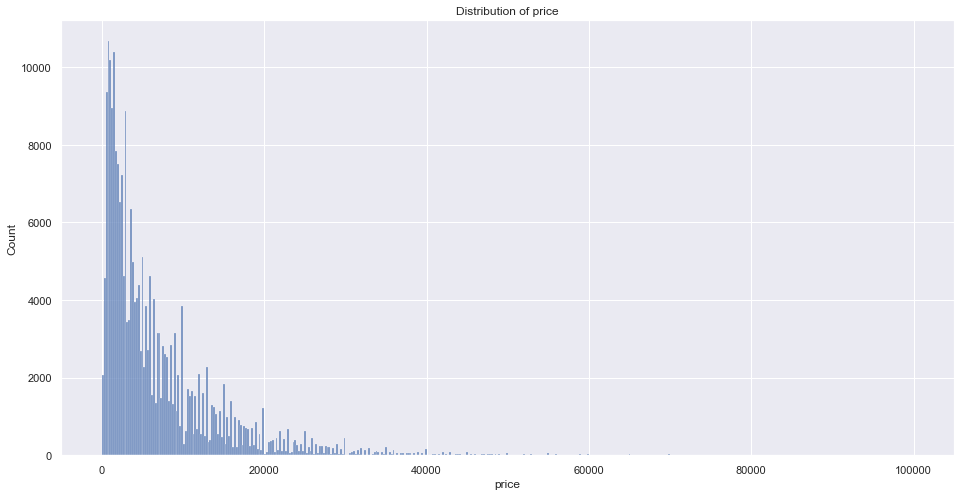

In [11]:
plt.figure(figsize=(16, 8))
sns.histplot(data=data, x = 'price' )
plt.title('Distribution of price')

In [12]:
data['log_price'] = np.log1p(data['price'])

Text(0.5, 1.0, 'Distribution of log price')

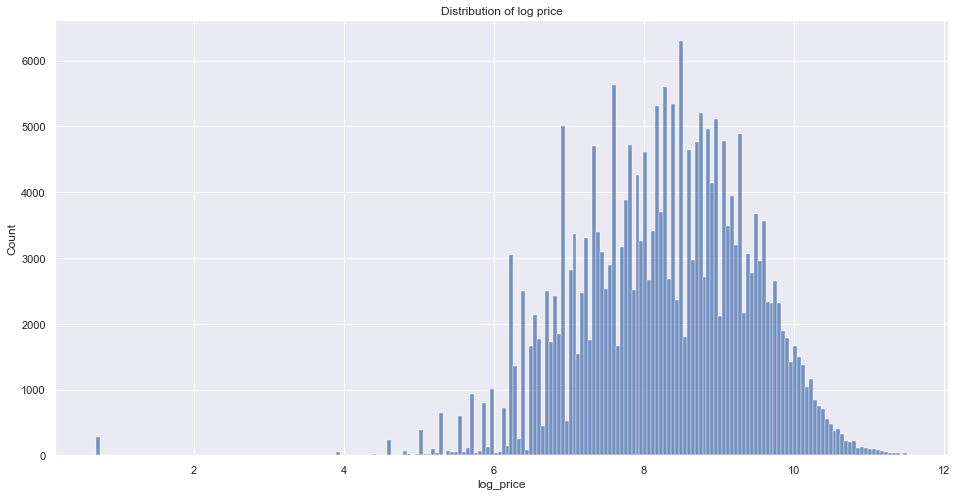

In [13]:
plt.figure(figsize=(16, 8))
sns.histplot(data=data, x = 'log_price' )
plt.title('Distribution of log price')

In [14]:
data = data.loc[data['log_price'] > 4]

In [15]:
data['notRepairedDamage'].value_counts()

nein    217409
ja       23420
Name: notRepairedDamage, dtype: int64

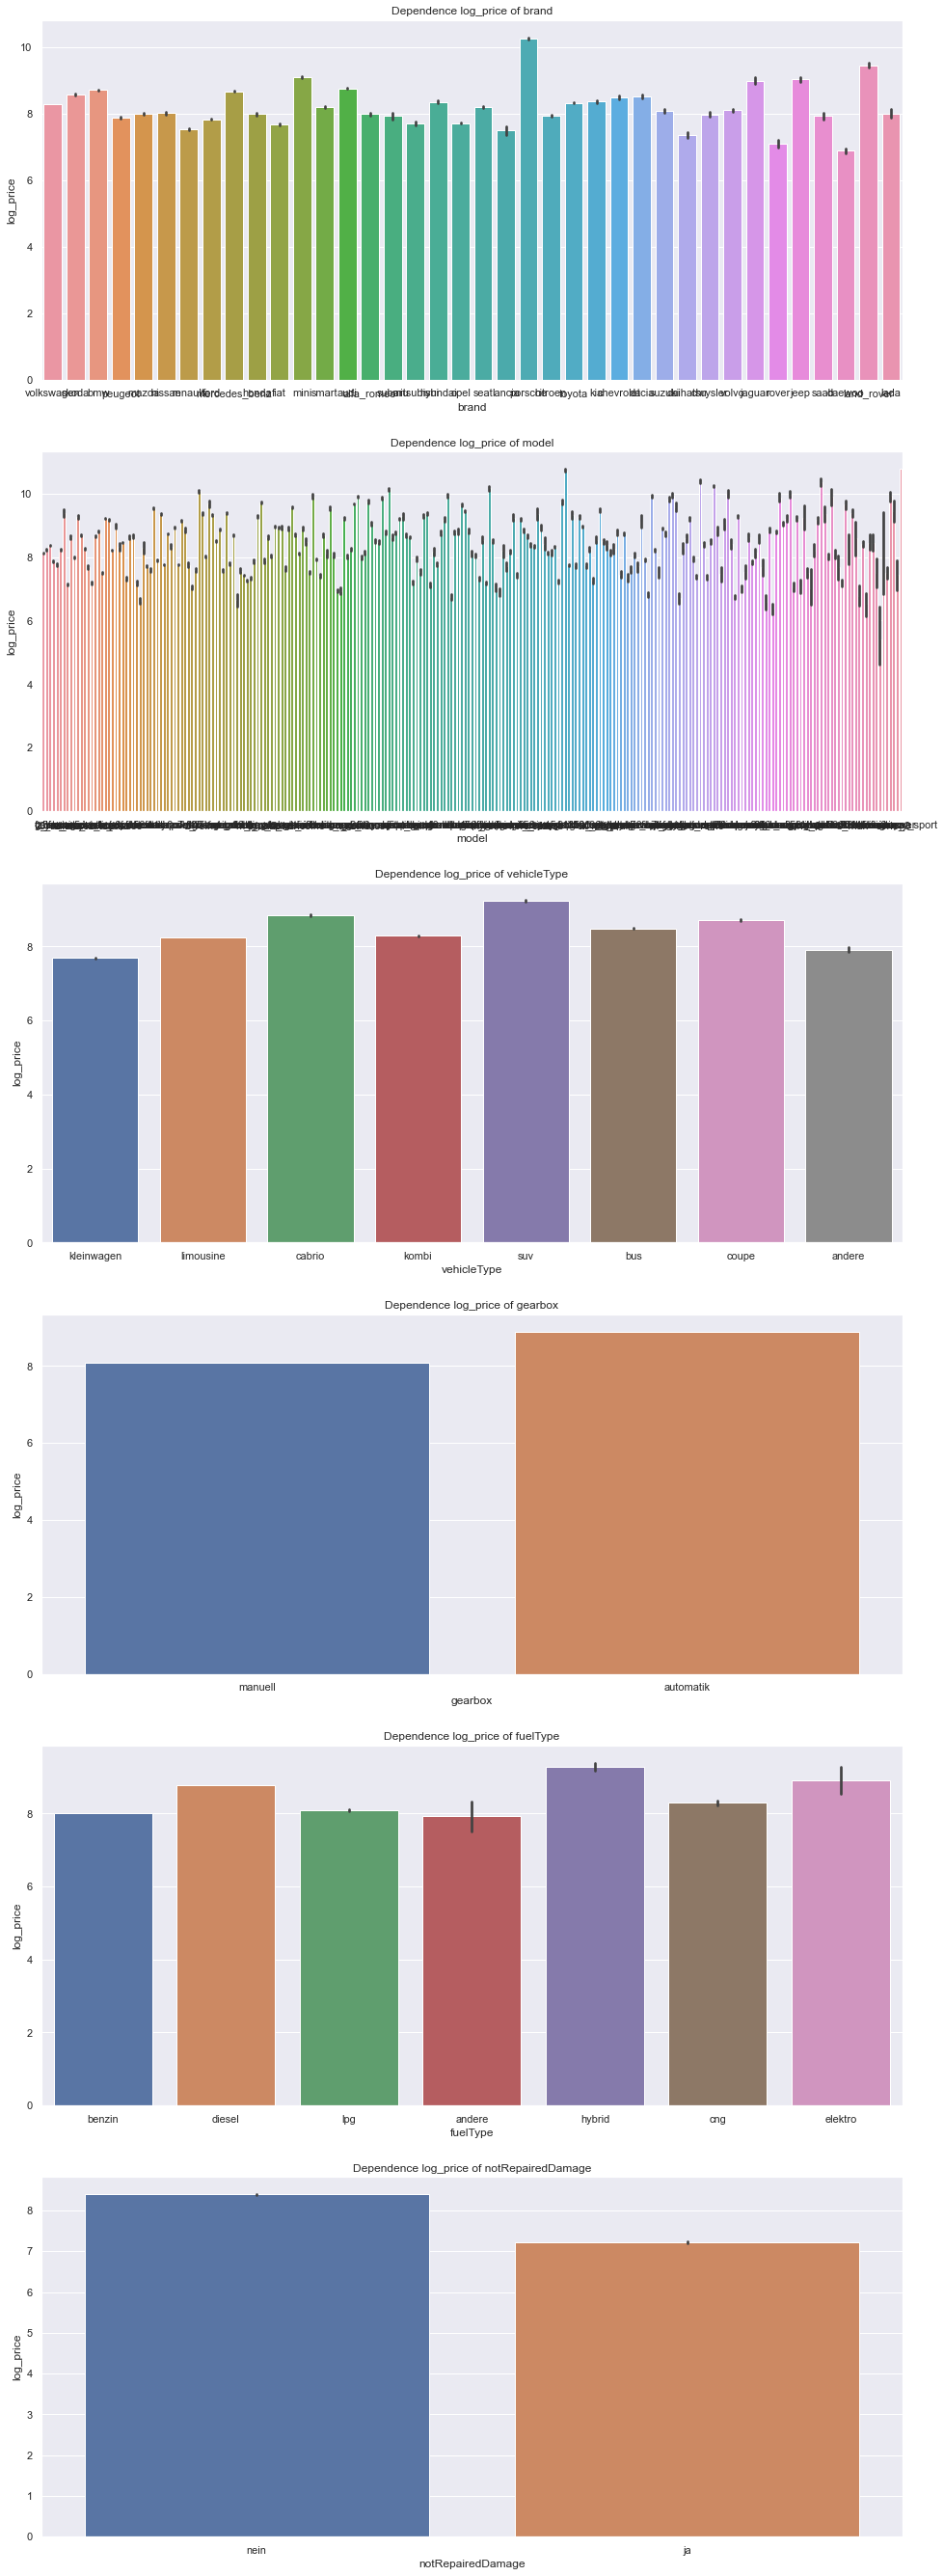

In [16]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(16, 8*6) )

axes = axes.flatten()

for i in range(6):
    
    sns.barplot(x=categorical[i], y='log_price', data=data, ax=axes[i])
    axes[i].set_title(f'Dependence log_price of {categorical[i]}')
    

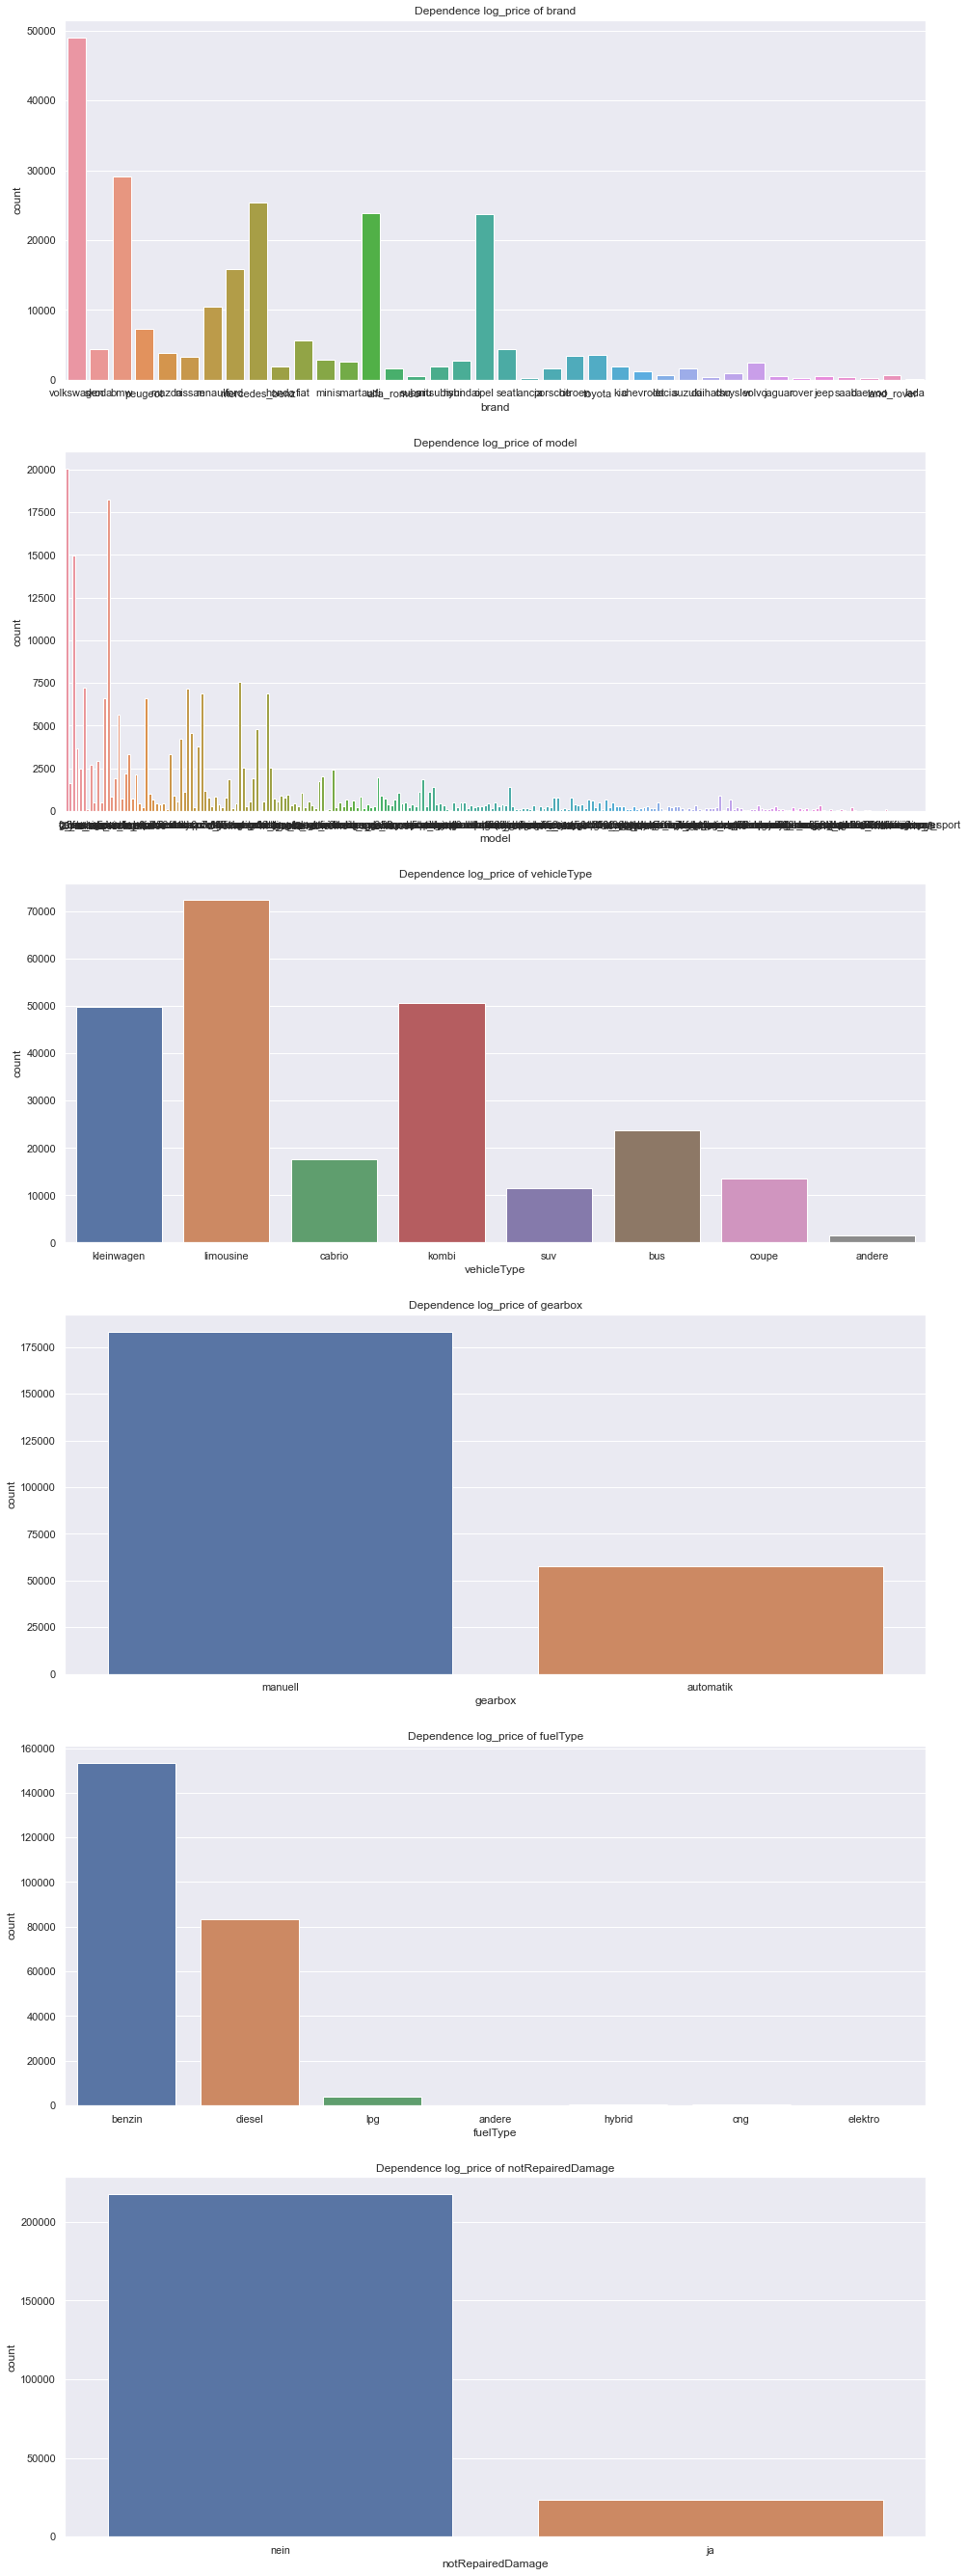

In [17]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(16, 8*6) )

axes = axes.flatten()

for i in range(6):
    
    sns.countplot(x=categorical[i], data=data, ax=axes[i])
    axes[i].set_title(f'Dependence log_price of {categorical[i]}')
    

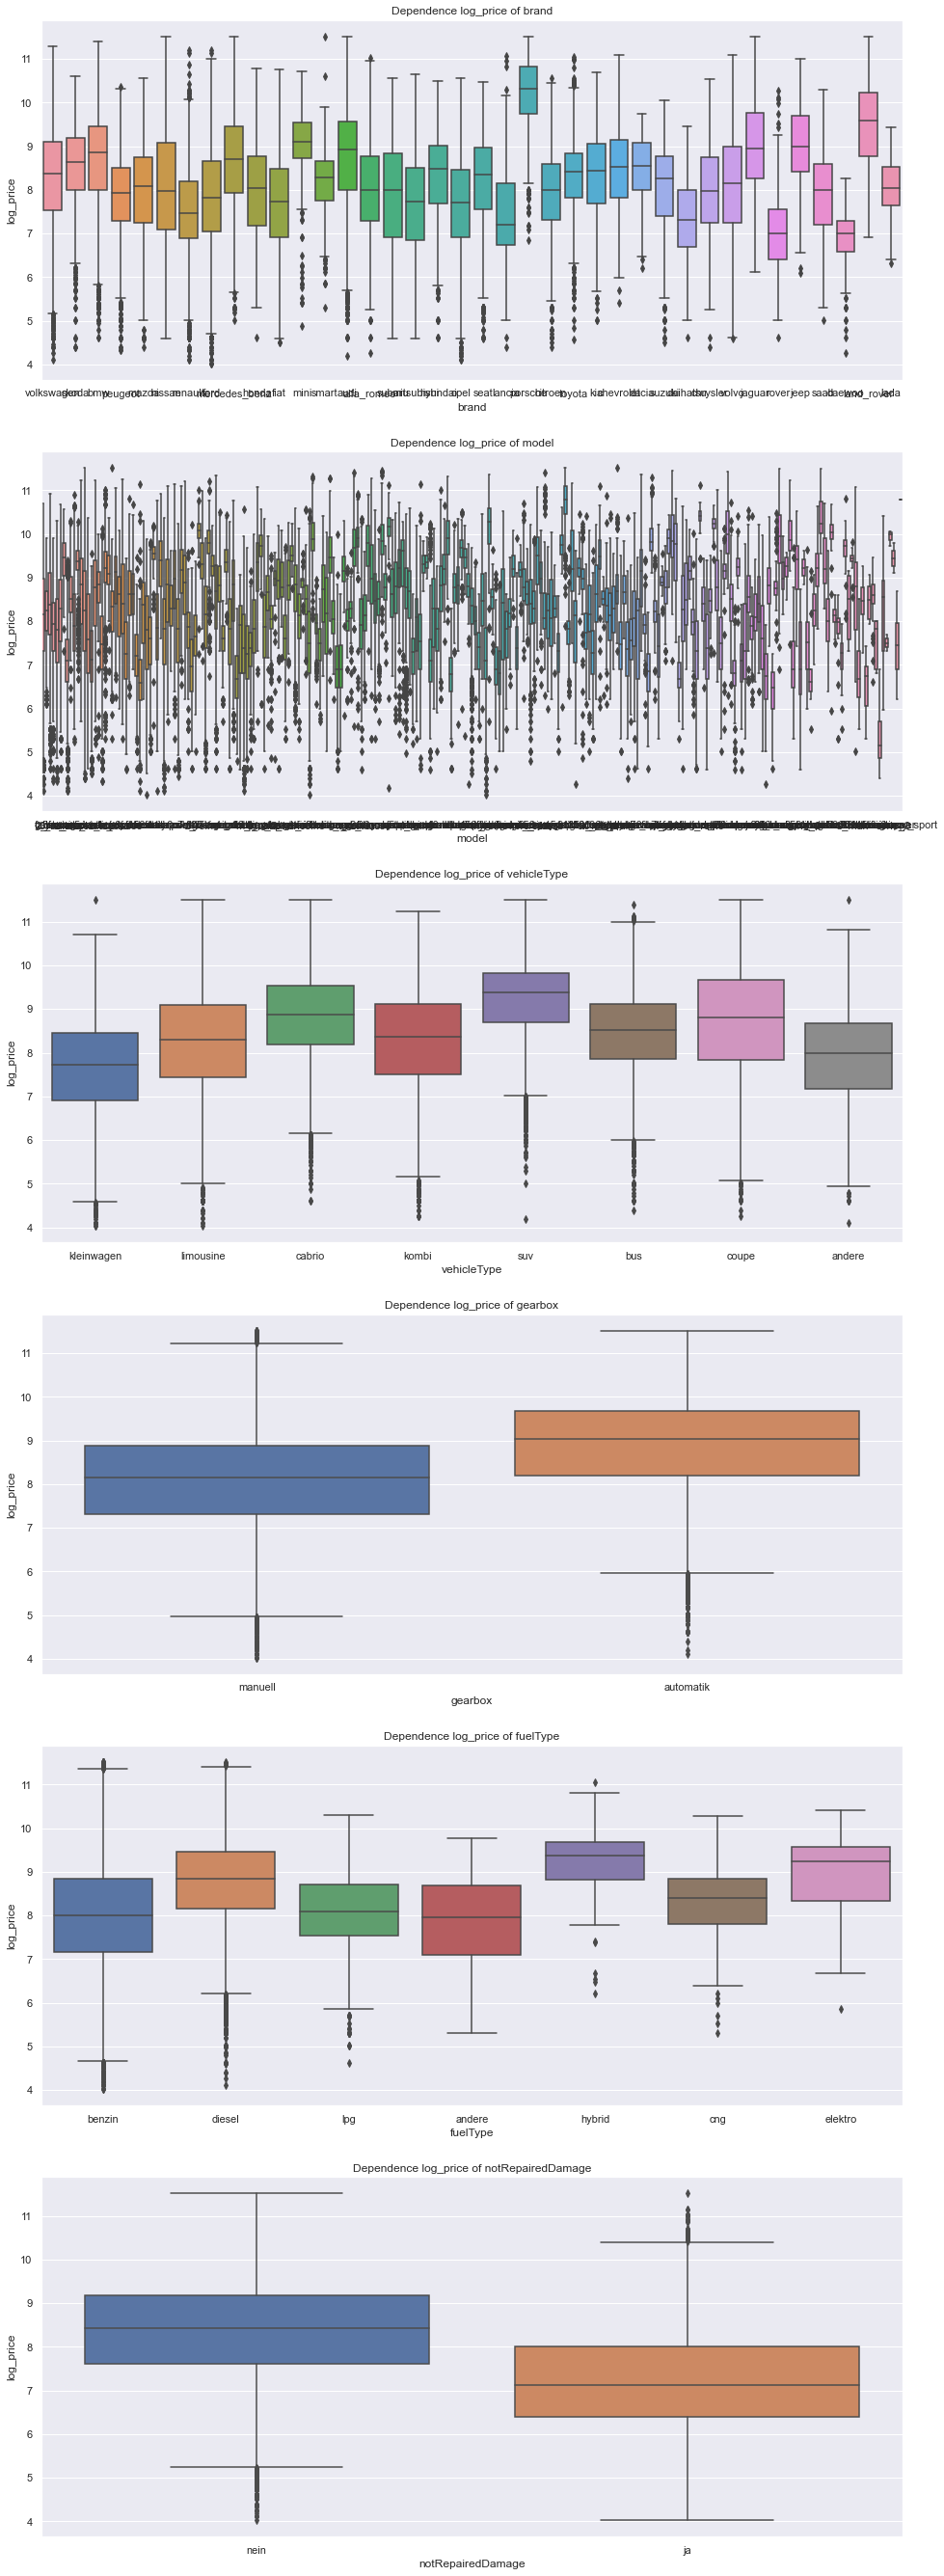

In [18]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(16, 8*6) )

axes = axes.flatten()

for i in range(6):
    
    sns.boxplot(x=categorical[i], y='log_price', data=data, ax=axes[i])
    axes[i].set_title(f'Dependence log_price of {categorical[i]}')

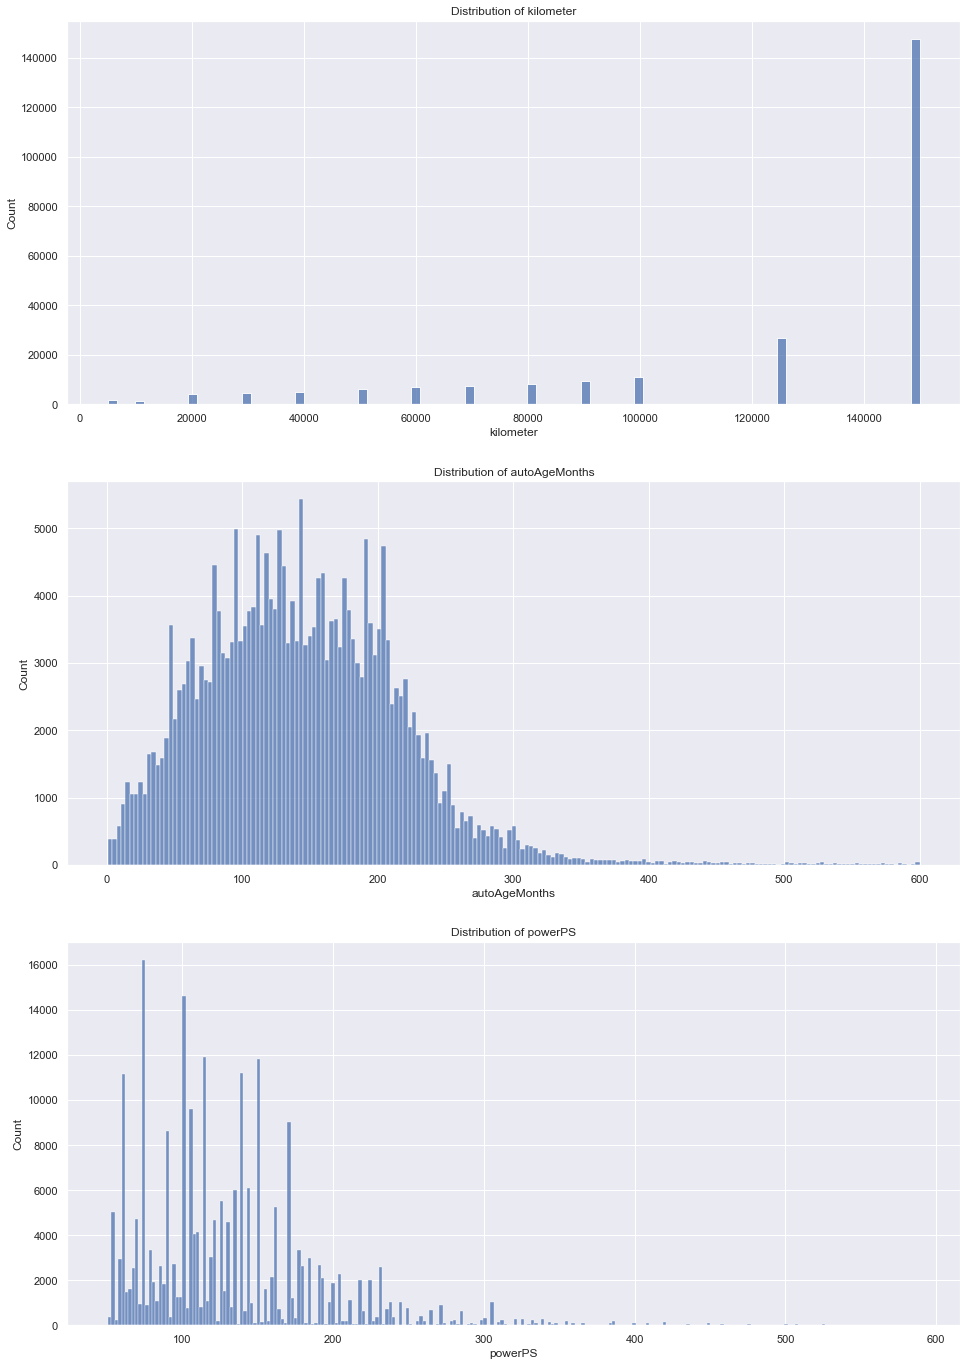

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 24) )

axes = axes.flatten()

for i in range(3):
    
    sns.histplot(x=numeric[i], data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {numeric[i]}')

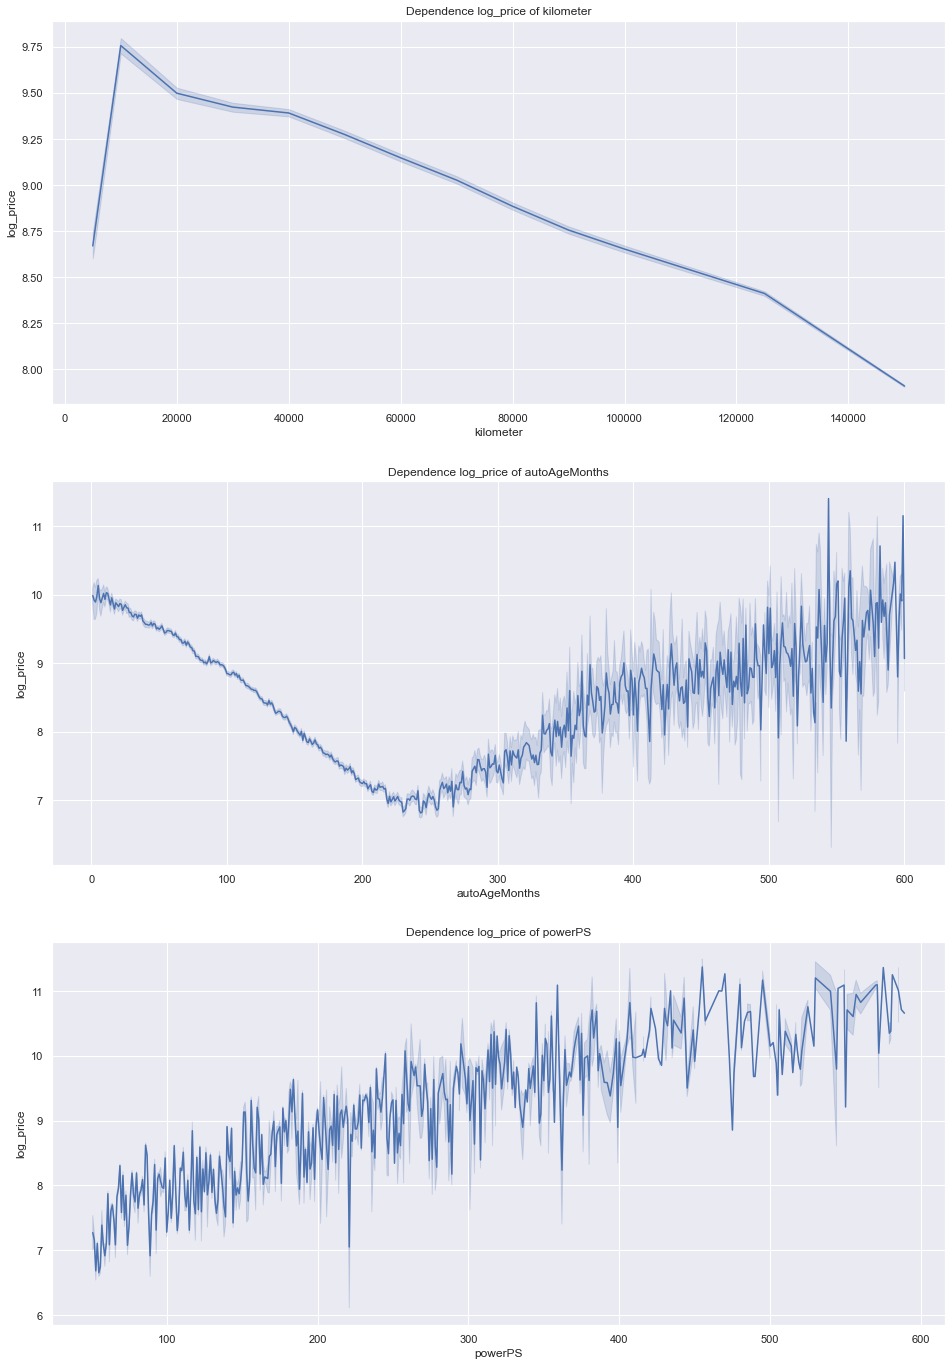

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 24) )

axes = axes.flatten()

for i in range(3):
    
    sns.lineplot(x=numeric[i], y='log_price', data=data, ax=axes[i])
    axes[i].set_title(f'Dependence log_price of {numeric[i]}')

<AxesSubplot:xlabel='square_Age', ylabel='log_price'>

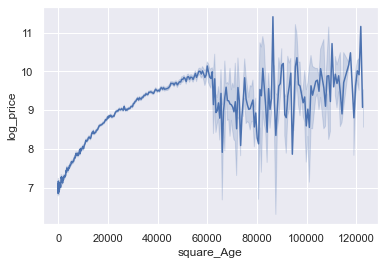

In [21]:
data['square_Age'] = (data['autoAgeMonths']-250)**2
numeric.append('square_Age')
sns.lineplot(x='square_Age', y='log_price', data=data)

In [22]:
data['notRepairedDamage'] = data['notRepairedDamage'].map({'ja': 1, 'nein': 0})
data['gearbox'] = data['gearbox'].map({'automatik': 1, 'manuell': 0})

In [23]:
class OneHotTopTransformer():
    def __init__(self, category, treshold):
        self.treshold = treshold
        self.category = category
        self.top_cats = []

    def fit(self, df):
        self.top_cats = df[
            self.category].value_counts()[lambda x: x > self.treshold].index

    def transform(self, X):
        df = X.copy()
        df[self.category] = np.where(df[self.category].isin(self.top_cats),
                                     df[self.category], 'another')
        return df

    def fit_transform(self, df):
        self.fit(df)
        df = self.transform(df)
        return df

In [24]:
ohe_top = OneHotTopTransformer('model', 1000)
data = ohe_top.fit_transform(data)

ohe_top = OneHotTopTransformer('brand', 1000)
data = ohe_top.fit_transform(data)

In [25]:
data = data.join(pd.get_dummies(data[categorical].astype('str'), dtype=np.int64)).drop(columns=categorical)

In [26]:
scaler = StandardScaler()
data[numeric] = scaler.fit_transform(data[numeric])

In [27]:
data['bias'] = 1


x = data.drop(columns=['log_price', 'price'])
y = data['log_price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [29]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0
    }
}

best_loss_info = {
    'full': {
        'loss': -np.inf,
        'lambda_': 0,
        'num_iter': 0,
        'loss_history': []
    },
    'stochastic': {
        'loss': -np.inf,
        'lambda_': 0,
        'num_iter': 0,
        'loss_history': []
    },
    'momentum': {
        'loss': -np.inf,
        'lambda_': 0,
        'num_iter': 0,
        'loss_history': []
    },
    'adam': {
        'loss': -np.inf,
        'lambda_': 0,
        'num_iter': 0,
        'loss_history': []
    },
}

lambdas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]

In [30]:

for descent in descent_names:
    descent_config['descent_name'] = descent
    print( descent)
    for lambda_ in lambdas:

        descent_config['kwargs']['lambda_'] = lambda_
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train.to_numpy(), y_train.to_numpy())
        loss = r2_score(y_val.to_numpy(),model.predict(X_val.to_numpy()) )
        if descent != 'adam' and  lambda_ > 1e1:
            break
        
        if loss > best_loss_info[descent]['loss']:
            best_loss_info[descent]['loss'] = loss
            best_loss_info[descent]['lambda_'] = lambda_
            best_loss_info[descent]['num_iter'] = len(model.loss_history) - 1
            best_loss_info[descent]['loss_history'] = model.loss_history
                
        print(f"lambda: {lambda_} loss : {loss:.4f} num_iter: {len(model.loss_history) - 1}")

full
lambda: 0.001 loss : 0.3080 num_iter: 300
lambda: 0.01 loss : 0.6730 num_iter: 300
lambda: 0.1 loss : -139685000.7987 num_iter: 5
lambda: 1 loss : -364177227868.5578 num_iter: 3
lambda: 10.0 loss : -727689155874.0396 num_iter: 2
stochastic
lambda: 0.001 loss : 0.3082 num_iter: 300
lambda: 0.01 loss : 0.6709 num_iter: 300
lambda: 0.1 loss : -146371753.9617 num_iter: 5
lambda: 1 loss : -676361257334.6158 num_iter: 3
lambda: 10.0 loss : -661129719061.5098 num_iter: 2
momentum
lambda: 0.001 loss : 0.6758 num_iter: 300
lambda: 0.01 loss : 0.7474 num_iter: 300
lambda: 0.1 loss : -28807481.0124 num_iter: 5
lambda: 1 loss : -346900179696.2455 num_iter: 3
lambda: 10.0 loss : -726673246234.3867 num_iter: 2
adam
lambda: 0.001 loss : -0.7649 num_iter: 1
lambda: 0.01 loss : -0.7662 num_iter: 1
lambda: 0.1 loss : -0.7663 num_iter: 1
lambda: 1 loss : -0.7653 num_iter: 1
lambda: 10.0 loss : -0.7165 num_iter: 85
lambda: 100.0 loss : -0.0346 num_iter: 300
lambda: 1000.0 loss : 0.7213 num_iter: 300


In [31]:
best_loss_info

{'full': {'loss': 0.6729700521931544,
  'lambda_': 0.01,
  'num_iter': 300,
  'loss_history': [112353251.82126845,
   51410697.995476484,
   49880884.1015887,
   48671786.31197362,
   47636632.551620826,
   46727139.52327151,
   45913977.50888357,
   45177504.91330516,
   44503808.88599833,
   43882620.01851542,
   43306110.87001388,
   42768159.20022136,
   42263873.66909332,
   41789276.203999504,
   41341082.18397305,
   40916544.03283684,
   40513337.247478776,
   40129475.61462011,
   39763246.98938632,
   39413163.86542889,
   39077924.78500656,
   38756383.82572726,
   38447526.19516356,
   38150448.50685329,
   37864342.6882906,
   37588482.73818484,
   37322213.74176039,
   37064942.69232477,
   36816130.77020306,
   36575286.80692389,
   36341961.72049284,
   36115743.75176842,
   35896254.36595705,
   35683144.70964234,
   35476092.53442872,
   35274799.51458197,
   35078988.89900273,
   34888403.44823168,
   34702803.61552834,
   34521965.93782441,
   34345681.60785777,
   

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [32]:
color_descent = {'full':'blue', 'stochastic':'red', 'momentum':'green', 'adam':'black'}

{'full': 'blue', 'stochastic': 'red', 'momentum': 'green', 'adam': 'black'}


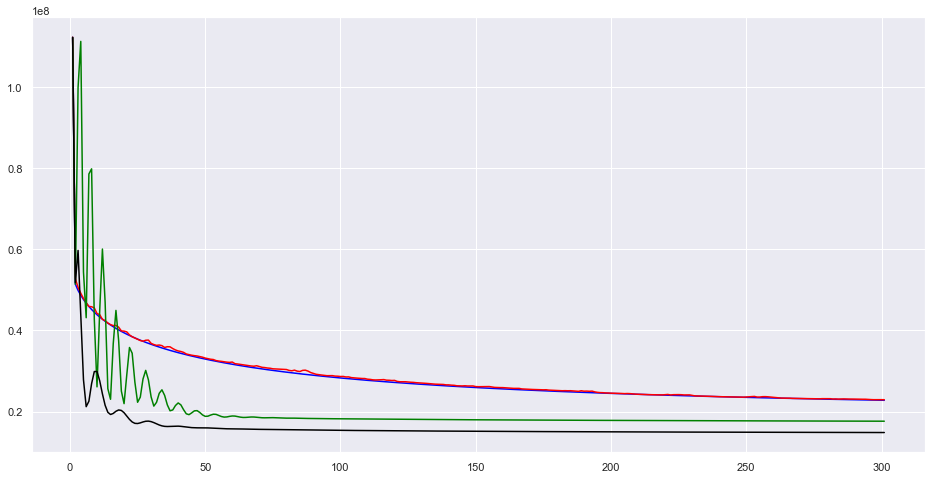

In [33]:
plt.figure(figsize=(16,8))
print(color_descent)
for i in best_loss_info.keys():
    
    sns.lineplot(x = range(1, best_loss_info[i]['num_iter']+2), y = best_loss_info[i]['loss_history'], color=color_descent[i])
    

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [34]:
import timeit

batch_sizes = np.arange(5, 500, 10)

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0.01,
        'batch_size':0
    }
}

batch_history = {}

for batch_size in batch_sizes:
    time_ = []
    iters = []
    descent_config['kwargs']['batch_size'] = batch_size
    print('batch size: ', batch_size)
    batch_history[batch_size] = {}
    
    
    for _ in range(10):
        
        model = LinearRegression(descent_config=descent_config, max_iter=1000, tolerance=1)
        start_time = timeit.default_timer()
        model.fit(X_train.to_numpy(), y_train.to_numpy())
        end_time = timeit.default_timer()
        time_.append(end_time-start_time)
        iters.append(len(model.loss_history)-1)
        
        
        

    mean_time = np.mean(time_)
    mean_num_iter = np.mean(iters)
    batch_history[batch_size]['num_iter'] = mean_num_iter
    batch_history[batch_size]['time'] = mean_time
    print(f"batch_size: {batch_size} time : {mean_time} num_iter: {mean_num_iter}")

batch size:  5
batch_size: 5 time : 3.6290624100000057 num_iter: 363.4
batch size:  15
batch_size: 15 time : 4.252111900000005 num_iter: 424.1
batch size:  25
batch_size: 25 time : 4.657148370000004 num_iter: 464.6
batch size:  35
batch_size: 35 time : 4.480915920000001 num_iter: 449.8
batch size:  45
batch_size: 45 time : 4.023592199999996 num_iter: 400.4
batch size:  55
batch_size: 55 time : 4.723866859999992 num_iter: 405.7
batch size:  65
batch_size: 65 time : 4.063562279999997 num_iter: 403.1
batch size:  75
batch_size: 75 time : 3.7729298099999937 num_iter: 412.7
batch size:  85
batch_size: 85 time : 3.851325670000006 num_iter: 421.4
batch size:  95
batch_size: 95 time : 3.794214770000008 num_iter: 415.2
batch size:  105
batch_size: 105 time : 4.056336609999983 num_iter: 440.2
batch size:  115
batch_size: 115 time : 3.6177742499999908 num_iter: 395.1
batch size:  125
batch_size: 125 time : 3.683119880000004 num_iter: 400.5
batch size:  135
batch_size: 135 time : 3.837212939999983

Text(0.5, 1.0, 'num iter dependency on batch_size')

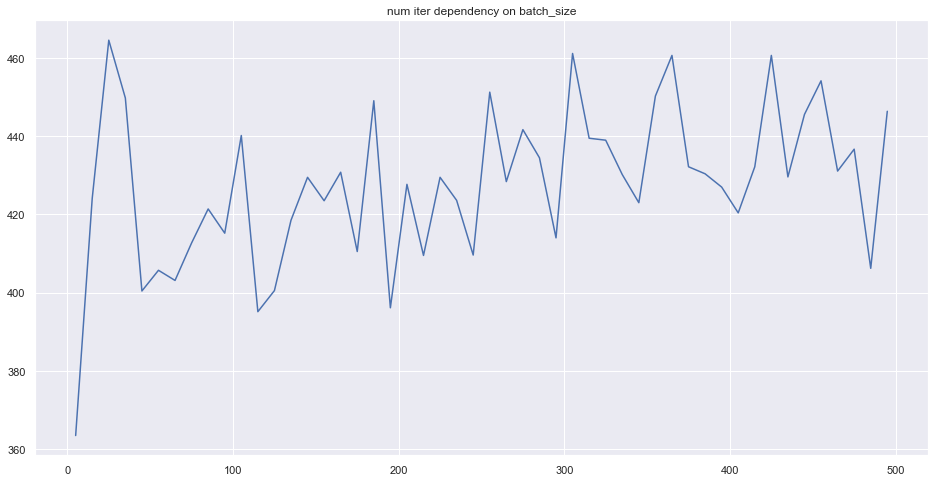

In [35]:
plt.figure(figsize=(16,8))
sns.lineplot(x=batch_history.keys(), y=[batch_history[i]['num_iter'] for i in batch_history.keys()])
plt.title('num iter dependency on batch_size')

Text(0.5, 1.0, 'time dependency on batch_size')

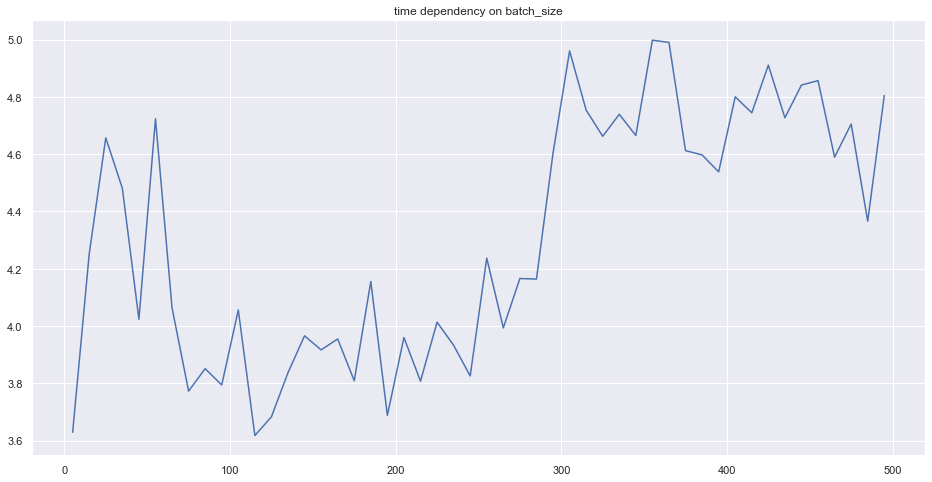

In [36]:
plt.figure(figsize=(16,8))
sns.lineplot(x=batch_history.keys(), y=[batch_history[i]['time'] for i in batch_history.keys()])
plt.title('time dependency on batch_size')

`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [37]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0,
        'mu': 0
    }
}

best_loss_info_reg = {
    'full': {
        'loss': -np.inf,
        'lambda_': 0,
        'num_iter': 0,
        'mu': 0,
        'loss_history': []
    },
    'stochastic': {
        'loss': -np.inf,
        'lambda_': 0,
        'num_iter': 0,
        'mu': 0,
        'loss_history': []
    },
    'momentum': {
        'loss': -np.inf,
        'lambda_': 0,
        'num_iter': 0,
        'mu': 0,
        'loss_history': []
    },
    'adam': {
        'loss': -np.inf,
        'lambda_': 0,
        'num_iter': 0,
        'mu': 0,
        'loss_history': []
    },
}

lambdas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]
alphas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

In [38]:

for descent in descent_names:
    descent_config['descent_name'] = descent
    print(descent)
    for lambda_ in lambdas:

        if descent != 'adam' and  lambda_ > 1e1:
            break
        for alpha in alphas:
            descent_config['kwargs']['lambda_'] = lambda_
            descent_config['kwargs']['mu'] = alpha
            model = LinearRegression(descent_config=descent_config)
            model.fit(X_train.to_numpy(), y_train.to_numpy())
            loss = r2_score(y_val.to_numpy(),model.predict(X_val.to_numpy()) )

            if loss > best_loss_info_reg[descent]['loss']:
                best_loss_info_reg[descent]['loss'] = loss
                best_loss_info_reg[descent]['lambda_'] = lambda_
                best_loss_info_reg[descent]['num_iter'] = len(model.loss_history) - 1
                best_loss_info_reg[descent]['loss_history'] = model.loss_history
                best_loss_info_reg[descent]['mu'] = alpha
                
            print(f"lambda: {lambda_} loss : {loss:.4f} num_iter: {len(model.loss_history) - 1}, mu: {alpha}")

full
lambda: 0.001 loss : 0.3080 num_iter: 300, mu: 0.001
lambda: 0.001 loss : 0.3080 num_iter: 300, mu: 0.01
lambda: 0.001 loss : 0.3077 num_iter: 300, mu: 0.1
lambda: 0.001 loss : 0.3042 num_iter: 300, mu: 1
lambda: 0.001 loss : 0.2644 num_iter: 300, mu: 10.0
lambda: 0.001 loss : -0.1099 num_iter: 150, mu: 100.0
lambda: 0.001 loss : -0.6394 num_iter: 6, mu: 1000.0
lambda: 0.01 loss : 0.6729 num_iter: 300, mu: 0.001
lambda: 0.01 loss : 0.6724 num_iter: 300, mu: 0.01
lambda: 0.01 loss : 0.6677 num_iter: 300, mu: 0.1
lambda: 0.01 loss : 0.6169 num_iter: 300, mu: 1
lambda: 0.01 loss : 0.3368 num_iter: 219, mu: 10.0
lambda: 0.01 loss : -0.1095 num_iter: 11, mu: 100.0
lambda: 0.01 loss : -46936324.3182 num_iter: 5, mu: 1000.0
lambda: 0.1 loss : -139794461.8983 num_iter: 5, mu: 0.001
lambda: 0.1 loss : -139877053.4478 num_iter: 5, mu: 0.01
lambda: 0.1 loss : -141527022.8643 num_iter: 5, mu: 0.1
lambda: 0.1 loss : -158867763.7320 num_iter: 5, mu: 1
lambda: 0.1 loss : -469039986.8424 num_iter

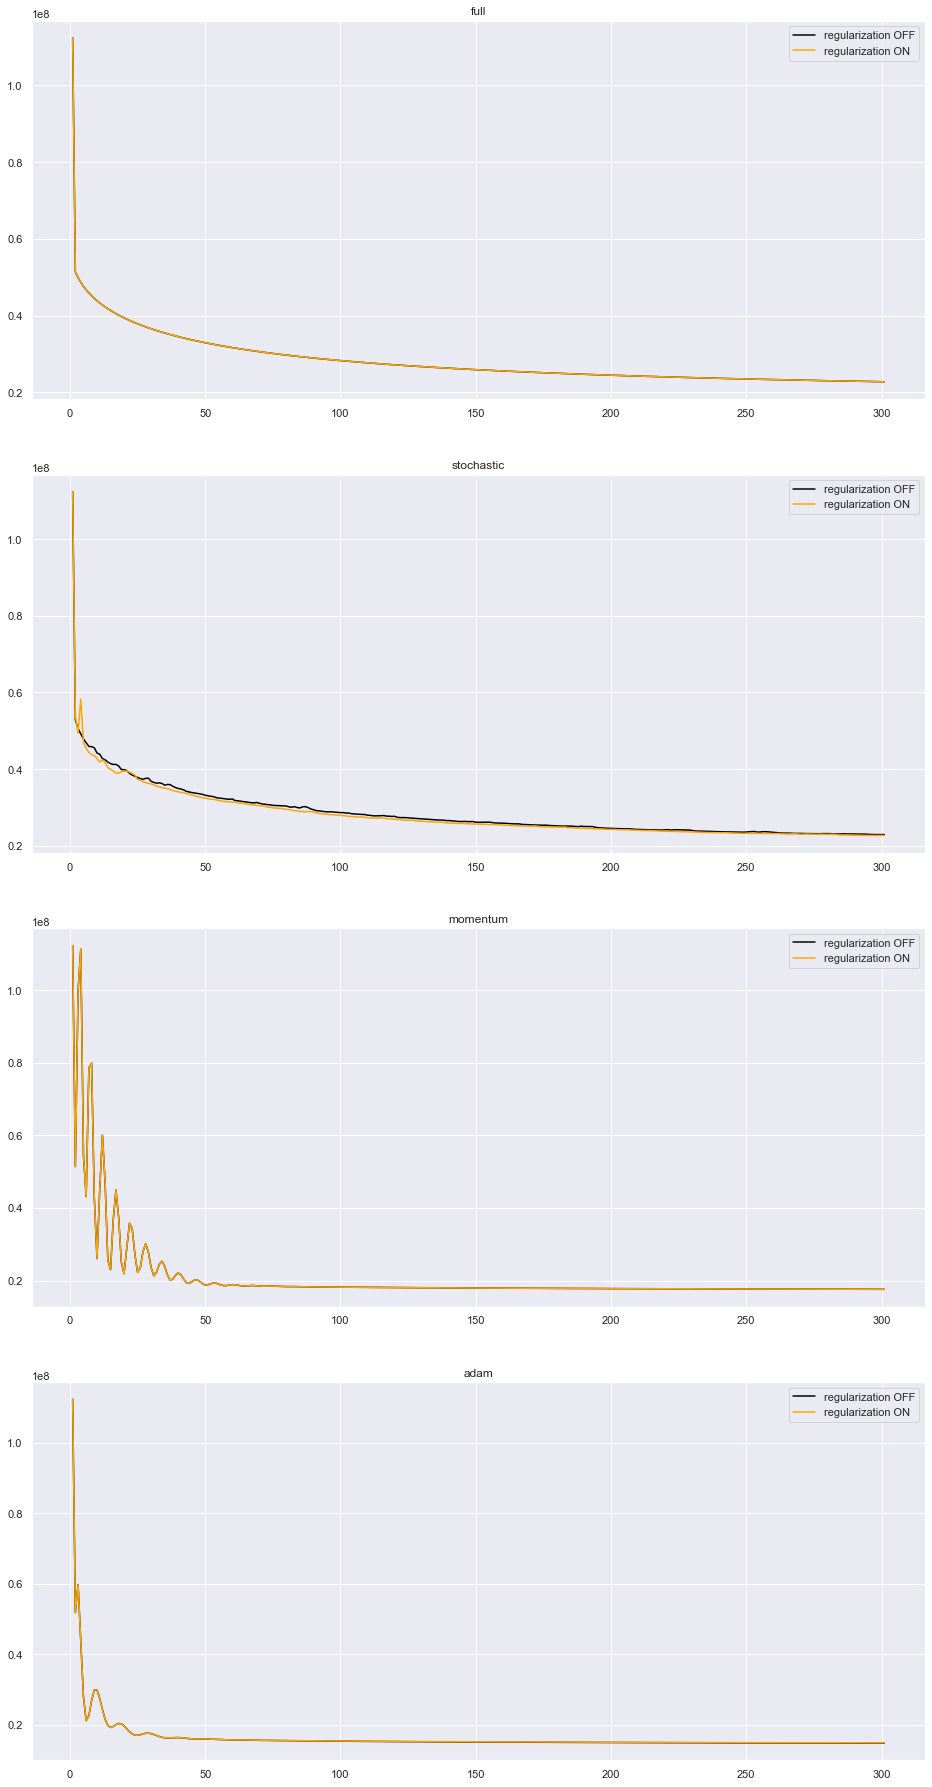

In [39]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16,32))
axes=axes.flatten()

for i in range(4):
    
    descent=descent_names[i]
    sns.lineplot(x=range(1, best_loss_info[descent]['num_iter']+2), y=best_loss_info[descent]['loss_history'], 
                 color='black', ax=axes[i], label='regularization OFF')
    sns.lineplot(x=range(1, best_loss_info_reg[descent]['num_iter']+2), y=best_loss_info_reg[descent]['loss_history'], 
                 color='orange', ax=axes[i], label='regularization ON')
    axes[i].set_title(descent)

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [40]:
descent_config = {
    'descent_name': 'amsgrad',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0
    }
}

amsgrad_loss_info = {
    'loss': -np.inf, 
    'lambda_': 0, 
    'loss_history': []
}

best_loss_ams =  {
        'loss': -np.inf,
        'lambda_': 0,
        'num_iter': 0,
        'loss_history': []
    }
lambdas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

In [41]:
print( 'AMSGrad')
for lambda_ in lambdas:

    descent_config['kwargs']['lambda_'] = lambda_
    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    loss = r2_score(y_val.to_numpy(),model.predict(X_val.to_numpy()) )

        
    if loss > best_loss_ams['loss']:
        best_loss_ams['loss'] = loss
        best_loss_ams['lambda_'] = lambda_
        best_loss_ams['num_iter'] = len(model.loss_history) - 1
        best_loss_ams['loss_history'] = model.loss_history
                
        print(f"lambda: {lambda_} loss : {loss:.4f} num_iter: {len(model.loss_history) - 1}")

AMSGrad
lambda: 0.001 loss : -0.7657 num_iter: 19
lambda: 0.01 loss : -0.7598 num_iter: 232
lambda: 0.1 loss : -0.7145 num_iter: 300
lambda: 1 loss : -0.3160 num_iter: 300
lambda: 10.0 loss : 0.6246 num_iter: 300
lambda: 100.0 loss : 0.7680 num_iter: 300


<AxesSubplot:>

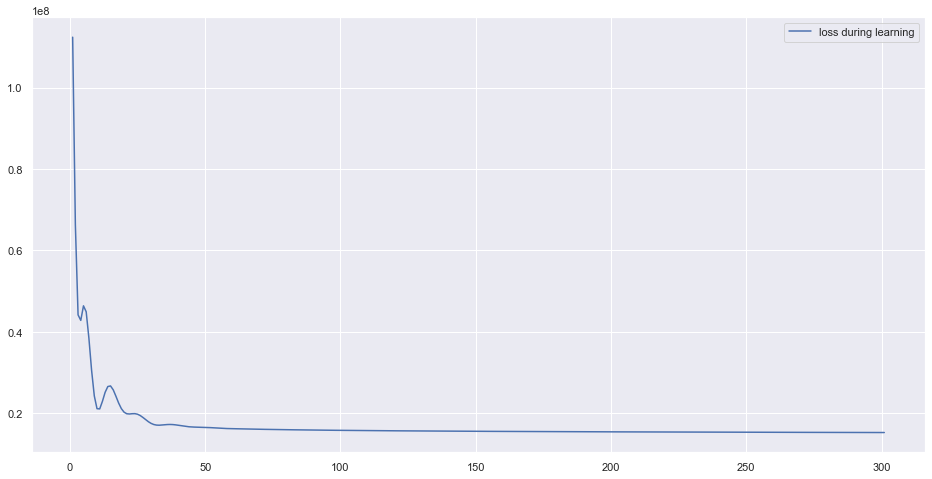

In [42]:
plt.figure(figsize=(16,8))
sns.lineplot(x = range(1, best_loss_ams['num_iter']+2), y = best_loss_ams['loss_history'], label='loss during learning')

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?